# 4.4 File Input and Output with Arrays

In [5]:
import numpy as np

In [2]:
arr = np.arange(10)

In [3]:
np.save('some_array', arr)

In [4]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
np.savez('array_archive.npz', a=arr, b=arr)

In [6]:
arch = np.load('array_archive.npz')

In [7]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

# 4.5 Linear Algebra

In [6]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [7]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [8]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [12]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [13]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [15]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [16]:
np.dot(x,np.ones(3))

array([ 6., 15.])

In [18]:
x @ np.ones(3)

array([ 6., 15.])

In [25]:
from numpy.linalg import inv, qr

In [31]:
X = np.random.randn(5, 5)

In [32]:
mat = X.T.dot(X)

In [33]:
inv(mat)

array([[ 3.94597018,  0.97820912, -1.29744791, -1.82095314,  3.36267338],
       [ 0.97820912,  0.66707105, -0.35890863, -0.61720737,  1.50412477],
       [-1.29744791, -0.35890863,  0.6519385 ,  0.35479488, -0.94665053],
       [-1.82095314, -0.61720737,  0.35479488,  1.94761668, -2.8164078 ],
       [ 3.36267338,  1.50412477, -0.94665053, -2.8164078 ,  5.27295963]])

In [34]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -1.94289029e-16, -2.22044605e-16,
        -5.27355937e-16, -6.10622664e-16],
       [ 0.00000000e+00,  1.00000000e+00, -4.44089210e-16,
         0.00000000e+00,  0.00000000e+00],
       [ 6.66133815e-16, -2.22044605e-16,  1.00000000e+00,
        -2.22044605e-16, -4.44089210e-16],
       [ 0.00000000e+00, -8.88178420e-16,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [-1.77635684e-15, -4.44089210e-16,  4.44089210e-16,
         8.88178420e-16,  1.00000000e+00]])

In [35]:
q, r = qr(mat)

In [36]:
r

array([[-3.06437323, -0.13928228, -7.10364553, -3.14933583, -0.95817804],
       [ 0.        , -7.47779607,  0.0261319 ,  4.40008156,  4.56620625],
       [ 0.        ,  0.        , -1.44701464, -1.11894282, -0.94970397],
       [ 0.        ,  0.        ,  0.        , -2.04944161, -1.13177656],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.14113603]])

# 4.6 Pseudorandom Number Generation

In [37]:
samples = np.random.normal(size=(4, 4))

In [38]:
samples

array([[-0.53798098, -0.56811668,  0.64532575,  0.93303528],
       [-1.22458879, -0.72202552,  0.87994972, -0.65743726],
       [ 1.50316258,  0.07929568,  2.27324026, -1.78303327],
       [-1.05467358,  0.40221303,  0.8884783 ,  2.30923786]])

In [39]:
from random import normalvariate

In [40]:
N = 1000000

In [42]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.25 s ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%timeit np.random.normal(size=N)

37.3 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
np.random.seed(1234)

In [45]:
rng = np.random.RandomState(1234)

In [46]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# 4.7 Example: Random Walks

In [9]:
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
    

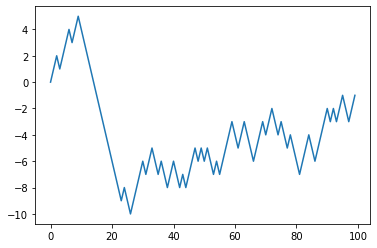

In [10]:
plt.plot(walk[:100])

In [12]:
nsteps = 1000

In [13]:
draws = np.random.randint(0, 2, size=nsteps)

In [14]:
steps = np.where(draws > 0, 1, -1)

In [15]:
walk = steps.cumsum()

In [16]:
walk.min()

-33

In [17]:
walk.max()

13

In [18]:
(np.abs(walk) >=10).argmax()

101

In [19]:
nwalks = 5000

In [20]:
nsteps = 1000

In [21]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps))

In [22]:
steps = np.where(draws > 0, 1, -1)

In [24]:
walks = steps.cumsum(1)

In [25]:
walks

array([[ -1,  -2,  -3, ..., -36, -35, -34],
       [  1,   2,   1, ..., -32, -31, -32],
       [ -1,   0,   1, ...,  68,  67,  68],
       ...,
       [  1,   0,  -1, ..., -10,  -9, -10],
       [  1,   0,   1, ..., -36, -35, -34],
       [ -1,   0,  -1, ..., -54, -55, -56]], dtype=int32)

In [26]:
walks.max()

134

In [27]:
walks.min()

-128

In [28]:
hits30 = (np.abs(walks) >=30).any(1)

In [29]:
hits30

array([ True,  True,  True, ...,  True,  True,  True])

In [30]:
hits30.sum()

3365

In [33]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [34]:
crossing_times.mean()

503.27875185735513

In [38]:
steps = np.random.normal(loc=0, scale=0.25,
                        size=(nwalks, nsteps))